<a href="https://colab.research.google.com/github/hans8854/hans8854/blob/main/0530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(240, 340, 3)
[[[165.5 105.5  16.6]]]
[[165.5 105.5  16.6]]
1
------------------------------
16.6


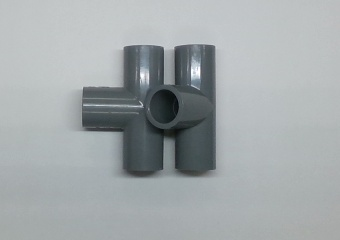

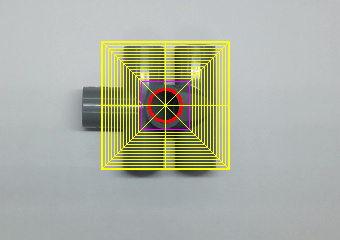

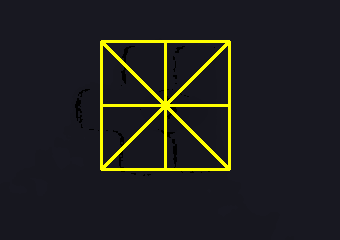

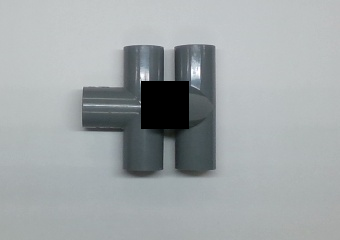

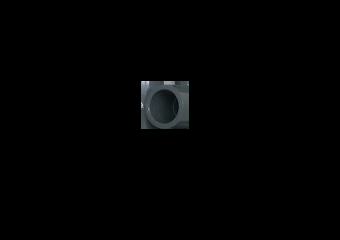

In [213]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 載入並顯示圖片
img = cv2.imread('/content/drive/MyDrive/saved_image/color_photo_test20.jpg')
depth = cv2.imread('/content/drive/MyDrive/saved_image/depth_photo_test20.png')
Scale = 0.0010000000474974513

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 輸出圖像大小，方便根據圖像大小調節minRadius和maxRadius
print(img.shape)
# 霍夫變換圓檢測
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,
                           100, param1=100, param2=30, minRadius=5, maxRadius=25)
# 輸出返回值，方便查看類型
print(circles)
print(circles[0])
# 輸出檢測到圓的個數
print(len(circles[0]))

print('------------------------------')
new_image = []
new_img = np.copy(img)
img_display = np.copy(img)
# 根據檢測到圓的信息，畫出每一個圓
for circle in circles[0]:
    # 圓的基本信息
    print(circle[2])
    # 座標行列
    x = int(circle[0])
    y = int(circle[1])
    # 半徑
    r = int(circle[2])
    # 在原圖用指定顏色標記出圓的位置
    offset = 8
    img_display = cv2.circle(img_display, (x, y), r, (0, 0, 255), 2)
    img_display = cv2.circle(img_display, (x, y), 2, (255, 255, 0), -1)
    img_display = cv2.rectangle(img_display, (x-r-offset, y-r-offset), (x+r+offset, y+r+offset), (255, 0, 255), 1)
    center_mask = np.zeros_like(new_img)
    
    center_mask[y-r-offset:y+r+offset,x-r-offset:x+r+offset] = new_img[y-r-offset:y+r+offset,x-r-offset:x+r+offset]
    
    new_img[y-r-offset:y+r+offset,x-r-offset:x+r+offset] = 0
    extend_size = 4
    pts = np.array([[[x, y], [x-extend_size*r, y-extend_size*r], [x, y-extend_size*r]],
              [[x, y], [x, y-extend_size*r], [x+extend_size*r, y-extend_size*r]],
              [[x, y], [x+extend_size*r, y-extend_size*r], [x+extend_size*r, y]],
              [[x, y], [x+extend_size*r, y], [x+extend_size*r, y+extend_size*r]],
              [[x, y], [x+extend_size*r, y+extend_size*r], [x, y+extend_size*r]],
              [[x, y], [x, y+extend_size*r], [x-extend_size*r, y+extend_size*r]],
              [[x, y], [x-extend_size*r, y+extend_size*r], [x-extend_size*r, y]],
              [[x, y], [x-extend_size*r, y], [x-extend_size*r, y-extend_size*r]]], np.int32)
    for i in range(8):
        img_display = cv2.polylines(img_display, [pts[i]], True, (0, 255, 255), thickness=1)
        depth = cv2.polylines(depth, [pts[i]], True, (0, 255, 255), thickness=2)
        mask = np.zeros_like(new_img)
        # 將三點連接起來形成三角形
        cv2.drawContours(mask, [pts[i]], 0, (255, 255, 255), -1)
        # 將圖像與掩碼圖像進行位元運算，提取三角形區域
        result = cv2.bitwise_and(new_img, mask)
        new_image.append(result)
    step = 3
    for i in range(int((((extend_size-1)*r)-offset)/step)):
      ex = (i+1)*step
      img_display = cv2.rectangle(img_display, (x-r-offset-ex, y-r-offset-ex), (x+r+offset+ex, y+r+offset+ex), (0, 255, 255), 1)


# 顯示新圖像
cv2_imshow(img)
cv2_imshow(img_display)
cv2_imshow(depth)
cv2_imshow(new_img)
cv2_imshow(center_mask)
# for i in range(len(new_image)):
#   cv2_imshow(new_image[i])


In [4]:
int((((extend_size-1)*r)-offset)/step)

13

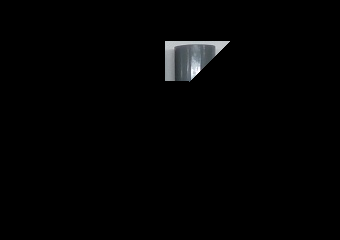

In [5]:
cv2_imshow(new_image[1])

單一方向＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝



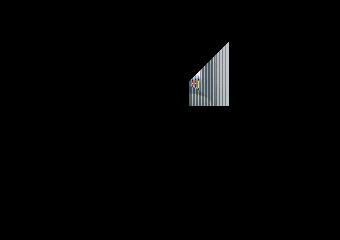

In [ ]:

t_list = []
for i in range(int((((extend_size-1)*r)-offset)/step)):
      # img_step = np.copy(new_image[0])
      mask = np.zeros_like(new_image[2])
      new_step = (i+1)*step
      cv2.rectangle(mask, (x-r-offset-new_step, y-r-offset-new_step), (x+r+offset+new_step, y+r+offset+new_step), (255, 255, 255), -1)
      # mask = mask[y-r-new_step:y+r+new_step,x-r-new_step:x+r+new_step]
      result = cv2.bitwise_and(new_image[2], mask)
      old_step = i*step
      result[y-r-offset-old_step:y+r+offset+old_step,x-r-offset-old_step:x+r+offset+old_step] = 0
      # img_step = cv2.rectangle(img_step, (x-r, y-r), (x+r, y+r), (0, 255, 255), 1)
      t_list.append(result)
      # cv2_imshow(result)
a = t_list[0]
for i in range(1,len(t_list),1):
  a = a + t_list[i]
cv2_imshow(a)

＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝



多方向＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

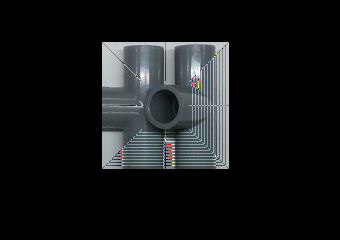

In [6]:
step = 3
all_dir_list = []
for dir in new_image:
  dir_list = []
  for i in range(int((((extend_size-1)*r)-offset)/step)):
        mask = np.zeros_like(dir)
        new_step = (i+1)*step
        cv2.rectangle(mask, (x-r-offset-new_step, y-r-offset-new_step), (x+r+offset+new_step, y+r+offset+new_step), (255, 255, 255), -1)
        # mask = mask[y-r-new_step:y+r+new_step,x-r-new_step:x+r+new_step]
        result = cv2.bitwise_and(dir, mask)
        old_step = i*step
        result[y-r-offset-old_step:y+r+offset+old_step,x-r-offset-old_step:x+r+offset+old_step] = 0
        # img_step = cv2.rectangle(img_step, (x-r, y-r), (x+r, y+r), (0, 255, 255), 1)
        dir_list.append(result)
        # cv2_imshow(result)
  all_dir_list.append(dir_list)
  print('===============')
a = np.copy(center_mask)
for i in all_dir_list:
  for j in i:
    a = a + j
cv2_imshow(a)



In [7]:
all_dir_list[0][0].shape

(240, 340, 3)

In [8]:
print(int((((extend_size-1)*r)-offset)/step))
print(len(dir_list))

13
13


＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

In [9]:
myArr = np.loadtxt('/content/drive/MyDrive/saved_image/depth_info20.csv', delimiter=',')
print(myArr)

[[446. 446. 446. ... 448. 448. 448.]
 [446. 446. 446. ... 448. 448. 448.]
 [446. 446. 446. ... 448. 448. 448.]
 ...
 [440. 440. 440. ... 442. 442. 442.]
 [440. 440. 440. ... 442. 442. 442.]
 [440. 440. 440. ... 442. 443. 443.]]


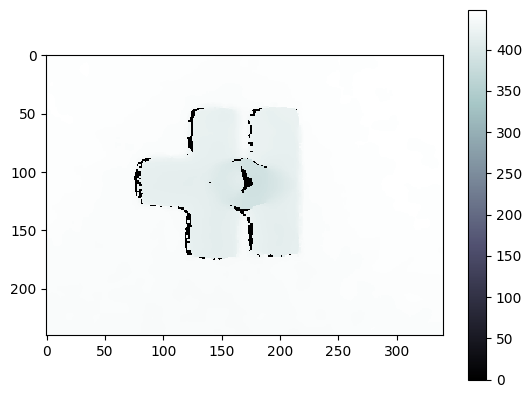

In [10]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(myArr, cmap='bone', interpolation='nearest')
plt.colorbar()
plt.show()

In [11]:
myArr = 440 - myArr
myArr[np.abs(myArr) <= 10] = 0
myArr[np.abs(myArr) >= 435] = 0


In [12]:
c = 0
for i in range(200):
  for j in range(200):
    if myArr[i,j] <= 10 and myArr[i,j] != 0:
      print(myArr[i,j])


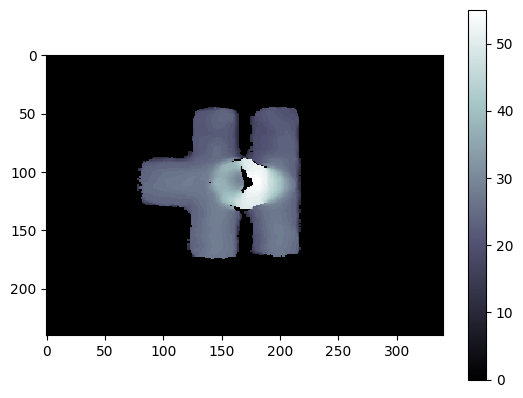

In [13]:
plt.imshow(myArr, cmap='bone', interpolation='nearest')
plt.colorbar()
plt.show()

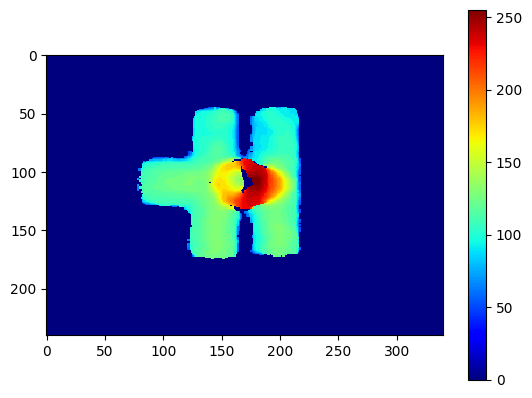

In [14]:
depth_data = np.copy(myArr)
# depth_data = cv2.cvtColor(depth_data,cv2.COLOR_GRAY2BGR)
# for i in range(int(2*r/3)):
#   ex = (i+1)*3
#   depth_data = cv2.rectangle(depth_data, (x-r-ex, y-r-ex), (x+r+ex, y+r+ex), (0, 255, 255), 1)
# for i in range(200):
#   for j in range(200):
#     if myArr[i,j] <= 20 and myArr[i,j] > 0:
#       depth_data[i,j] = (255, 255, 0)
def normalize_image(image):
    # 將圖像轉換為浮點數類型
    image = image.astype(np.float32)
    
    # 最小值和最大值歸一化到0到255
    min_val = np.min(image)
    max_val = np.max(image)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    # 將數值四捨五入為整數類型
    image = image.astype(np.uint8)
    
    return image
depth_data = normalize_image(depth_data)

plt.imshow(depth_data, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()


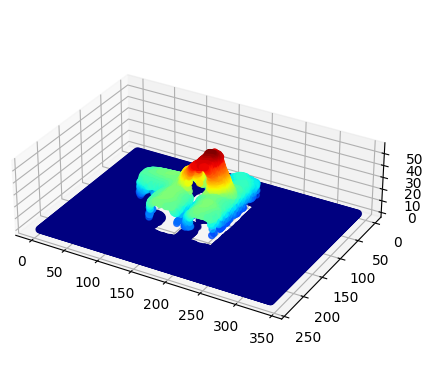

In [15]:
from mpl_toolkits.mplot3d import Axes3D
Y = np.arange(0,np.shape(myArr)[0],1)
X = np.arange(0,np.shape(myArr)[1],1)
X,Y = np.meshgrid(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X,Y,myArr,c = depth_data,cmap='jet')
ax.invert_yaxis()
# ax.invert_xaxis()
# ax.view_init(elev=90, azim=0)
ax.set_box_aspect([350, 250, 100])
plt.show()


In [ ]:
cnt = 0
center_gray = cv2.cvtColor(center_mask, cv2.COLOR_BGR2GRAY)
nonzero_pixels = np.nonzero(center_gray)
center_values = np.max(myArr[nonzero_pixels])
cv2_imshow(center_mask)
img_combine = np.copy(center_mask)#組合圖
all_dir_high = [] #所有方向高度list
print(center_values)
for i in all_dir_list:
  print(cnt,'=================================================================================')
  pts_cnt = 0
  plt.clf()
  plt.scatter(pts_cnt, center_values)
  plt.text(pts_cnt, center_values, str(center_values), ha='center', va='bottom')
  dir_high = [] #高度變化list
  dir_high.append(center_values)
  # print(center_values)
  for j in i:
  # 尋找非零像素的位置
    img_gray = cv2.cvtColor(j, cv2.COLOR_BGR2GRAY)
    count_all = np.count_nonzero(img_gray) #整區數量
    nonzero_pixels = np.nonzero(img_gray)
    # print(nonzero_pixels)
    count_nonzero = np.count_nonzero(myArr[nonzero_pixels])
    # print(count_nonzero,int(count_all/8))
    if count_nonzero < int(count_all/10):
      max_values = 0
    else:
      max_values = np.max(myArr[nonzero_pixels])#提取非零像素的最大值
      img_combine = cv2.add(img_combine,j)
    dir_high.append(max_values)
    # print(myArr[nonzero_pixels])
    # print(len(myArr[nonzero_pixels]))
    # print(len(np.array(np.nonzero(myArr[nonzero_pixels]))))
    plt.scatter(pts_cnt + 1, max_values)
    plt.text(pts_cnt + 1, max_values, str(max_values), ha='center', va='bottom')
    
    pts_cnt = pts_cnt + 1
  dir_high = np.array(dir_high)
  all_dir_high.append(dir_high)  
  plt.title(str(cnt))
  plt.ylim(0, center_values+1)
  plt.show()
  cnt = cnt+1
# img_combine = cv2.cvtColor(img_combine, cv2.COLOR_BGR2GRAY)
img_combine[np.where((img_combine != [0, 0, 0]).all(axis=2))] = [255, 255, 255]
# print(img.shape)

cut_img = cv2.bitwise_and(img,img_combine)
cv2_imshow(cut_img)
    

In [17]:
all_dir_high

[array([55., 25., 24., 24., 23., 22., 23., 23., 24., 24., 24., 24., 23.,
         0.]),
 array([55., 21., 22., 22., 23., 22., 22., 22., 22., 22., 22., 22., 21.,
         0.]),
 array([55., 50., 46., 43., 41., 37., 33., 30., 27., 24., 20.,  0.,  0.,
         0.]),
 array([55., 50., 47., 44., 42., 39., 35., 32., 29., 26., 24.,  0.,  0.,
         0.]),
 array([55., 51., 27., 27., 27., 28., 28., 28., 28., 28., 28., 28., 28.,
        27.]),
 array([55., 48., 31., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28.]),
 array([55., 31., 28., 28., 27., 28., 28., 28., 28., 27., 27., 27., 27.,
        27.]),
 array([55., 30., 28., 28., 27., 28., 28., 28., 27., 27., 27., 27., 27.,
        26.])]

In [18]:
all_height_change = []
for i in all_dir_high:
  height_change = []
  for j in range(len(i)-1):
    if i[j+1] != 0:
      change = i[j+1]-i[j]
      height_change.append(change)
    else:
      break
  height_change = np.array(height_change)
  all_height_change.append(height_change)


In [19]:
all_height_change

[array([-30.,  -1.,   0.,  -1.,  -1.,   1.,   0.,   1.,   0.,   0.,   0.,
         -1.]),
 array([-34.,   1.,   0.,   1.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,
         -1.]),
 array([-5., -4., -3., -2., -4., -4., -3., -3., -3., -4.]),
 array([-5., -3., -3., -2., -3., -4., -3., -3., -3., -2.]),
 array([ -4., -24.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  -1.]),
 array([ -7., -17.,  -3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([-24.,  -3.,   0.,  -1.,   1.,   0.,   0.,   0.,  -1.,   0.,   0.,
          0.,   0.]),
 array([-25.,  -2.,   0.,  -1.,   1.,   0.,   0.,  -1.,   0.,   0.,   0.,
          0.,  -1.])]

In [20]:
for i in all_height_change: 
  print(len(i))

12
12
10
10
13
13
13
13


In [21]:
blob = []
for dir in range(len(all_height_change)):
  slope_cnt = 0
  slope_length = 0
  for i in all_height_change[dir]:
    if i < 0:
      if i < -15:
        slope_cnt += 1
      slope_length += 1
    else :
      slope_length = 0
  print(slope_cnt)
  print(slope_length)
  print('===========')
  if slope_cnt < 1 and slope_length > 5:
    blob.append(dir)


1
1
1
1
0
10
0
10
1
1
1
0
1
0
1
1


In [22]:

def dir_R(R):
  if R+1 == 8:
    return 0
  else:
    return R+1
def dir_L(L):
  if L-1 < 0:
    return 7
  else:
    return L-1


if len(blob) != 0:
  right = dir_R(max(blob))
  left = dir_L(min(blob))
  blob.append(right)
  blob.append(left)


blob

[2, 3, 4, 1]

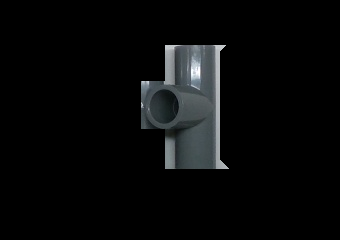

In [23]:
region_blob = np.copy(center_mask)#組合圖
for i in blob:
  region_blob = cv2.add(region_blob,new_image[i])

region_blob[np.where((region_blob != [0, 0, 0]).all(axis=2))] = [255, 255, 255]


blob_img = cv2.bitwise_and(cut_img,region_blob)
cv2_imshow(blob_img)

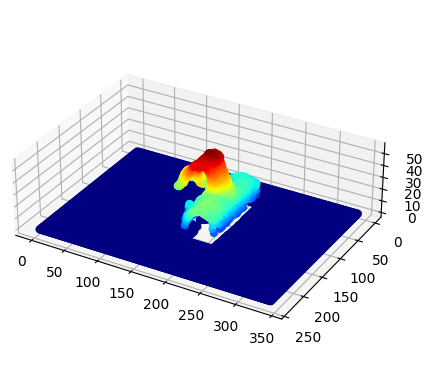

In [24]:
from mpl_toolkits.mplot3d import Axes3D

depth_data_result = np.copy(myArr)

depth_data_result[np.where((blob_img == [0, 0, 0]).all(axis=2))] = 0

Y = np.arange(0,np.shape(depth_data_result)[0],1)
X = np.arange(0,np.shape(depth_data_result)[1],1)
X,Y = np.meshgrid(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X,Y,depth_data_result,c = depth_data_result, cmap='jet')
ax.invert_yaxis()
# ax.invert_xaxis()
# ax.view_init(elev=90, azim=0)
ax.set_box_aspect([350, 250, 100])
plt.show()


In [25]:
gray_blob_img = cv2.cvtColor(blob_img, cv2.COLOR_BGR2GRAY)

# depth_data_fit = np.copy(depth_data_result)
# depth_data_fit[depth_data_fit != 0] = 1

cnt, hierarchy = cv2.findContours(gray_blob_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ellipse = cv2.fitEllipse(cnt[0])
# # # 绘制椭圆
img_ellipse = np.copy(img)
img_ellipse = cv2.ellipse(img_ellipse,ellipse,(211,160,211),2)

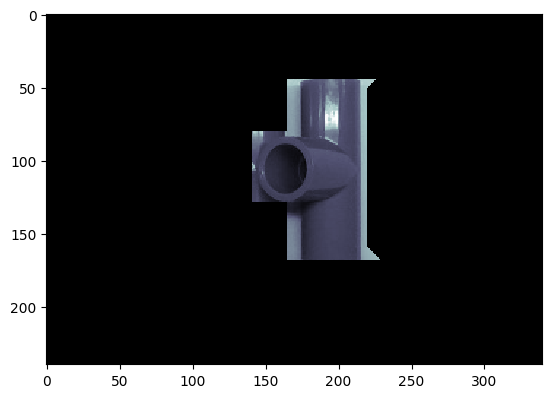

In [26]:
plt.imshow(gray_blob_img, cmap='bone', interpolation='nearest')

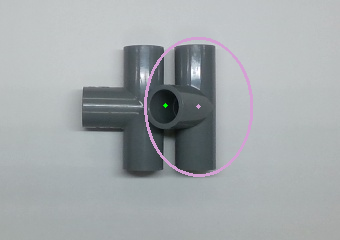

In [27]:
ellipse_xy = np.around(np.array(ellipse[0])).astype(int)
ellipse_ab = np.around(np.array(ellipse[1])).astype(int)
ellipse_angle = np.around(np.array(ellipse[2])).astype(int)
img_ellipse = cv2.circle(img_ellipse, ellipse_xy, 2, (211,160,211), -1)
img_ellipse = cv2.circle(img_ellipse, (x,y), 2, (0, 255, 0), -1)
cv2_imshow(img_ellipse)


89
179


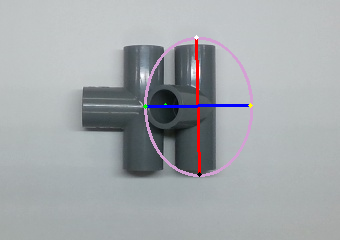

In [28]:
import math


if ellipse_angle > 90:
    ellipse_angle = ellipse_angle - 90
else:
    ellipse_angle = ellipse_angle + 90
print(ellipse_angle)

# draw major axis line in red
rmajor = max(ellipse_ab)/2
maj_x1 = ellipse_xy[0] + math.cos(math.radians(ellipse_angle))*rmajor
maj_y1 = ellipse_xy[1] + math.sin(math.radians(ellipse_angle))*rmajor
maj_x2 = ellipse_xy[0] + math.cos(math.radians(ellipse_angle+180))*rmajor
maj_y2 = ellipse_xy[1] + math.sin(math.radians(ellipse_angle+180))*rmajor
cv2.line(img_ellipse, (int(maj_x1),int(maj_y1)), (int(maj_x2),int(maj_y2)), (0, 0, 255), 2)

# draw minor axis line in blue
if ellipse_angle > 90:
    ellipse_angle = ellipse_angle - 90
else:
    ellipse_angle = ellipse_angle + 90
print(ellipse_angle)
rminor = min(ellipse_ab)/2
min_x1 = ellipse_xy[0] + math.cos(math.radians(ellipse_angle))*rminor
min_y1 = ellipse_xy[1] + math.sin(math.radians(ellipse_angle))*rminor
min_x2 = ellipse_xy[0] + math.cos(math.radians(ellipse_angle+180))*rminor
min_y2 = ellipse_xy[1] + math.sin(math.radians(ellipse_angle+180))*rminor
cv2.line(img_ellipse, (int(min_x1),int(min_y1)), (int(min_x2),int(min_y2)), (255, 0, 0), 2)

img_ellipse = cv2.circle(img_ellipse, (int(maj_x1),int(maj_y1)), 2, (0, 0, 0), -1) #black
img_ellipse = cv2.circle(img_ellipse, (int(maj_x2),int(maj_y2)), 2, (255, 255, 255), -1) #white
img_ellipse = cv2.circle(img_ellipse, (int(min_x1),int(min_y1)), 2, (0, 255, 0), -1) #green
img_ellipse = cv2.circle(img_ellipse, (int(min_x2),int(min_y2)), 2, (0, 255, 255), -1) #yellow

ellipse_pts = [(int(maj_x1),int(maj_y1)), (int(maj_x2),int(maj_y2)), (int(min_x1),int(min_y1)), (int(min_x2),int(min_y2))]
cv2_imshow(img_ellipse)

In [29]:
ellipse_pts

[(199, 174), (196, 37), (145, 106), (250, 105)]

In [30]:
from math import dist
circle_distance = []
for i in ellipse_pts:
  circle_distance.append(dist((x,y),i))
circle_distance = np.array(circle_distance)
if np.argmin(circle_distance) <= 1:
  if np.argmin(circle_distance) == 0:
    print('go 1')
    translate_point = ellipse_pts[1]
  else:
    print('go 0')
    translate_point = ellipse_pts[0]
else:
  if np.argmin(circle_distance) == 2:
    print('go 3')
    translate_point = ellipse_pts[3]
  else:
    print('go 2')
    translate_point = ellipse_pts[2]

go 3


In [31]:
translate_point

(250, 105)

In [32]:
print("方程式:")
k = (ellipse_xy[1] - maj_y1) / (ellipse_xy[0] - maj_x1)
b = maj_y1 - k * maj_x1
print("\ty = %.2f*x + %.2f" % (k, b))

方程式:
	y = 57.29*x + -11237.41


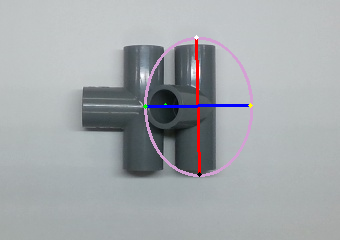

In [33]:
# img_ellipse = cv2.line(img_ellipse, (int(-b/k),0), (int((240-b)/k),340), (0,255,255), 1)
cv2_imshow(img_ellipse)

In [34]:
pts1 = (((maj_x1+ellipse_xy[0])/2),((maj_y1+ellipse_xy[1])/2))
pts2 = (((ellipse_xy[0]+pts1[0])/2),((ellipse_xy[1]+pts1[1])/2))

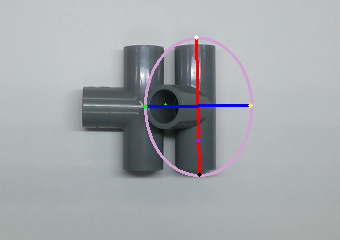

In [35]:
img_ellipse = cv2.circle(img_ellipse, (int(pts2[0]),int(pts2[1])), 2, (42, 42, 128), -1) #棕色
img_ellipse = cv2.circle(img_ellipse, (int(pts1[0]),int(pts1[1])), 2, (226, 43, 138), -1) #紫色

cv2_imshow(img_ellipse)

In [36]:
print(myArr[ellipse_xy[1],ellipse_xy[0]]) #red
print(myArr[int(pts2[1]),int(pts2[0])])  #brown
print(myArr[int(pts1[1]),int(pts1[0])])  #purple



42.0
33.0
27.0


In [37]:
img.shape[:2]

(240, 340)

In [ ]:
import numpy as np
def calculate_slope(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    if x2 - x1 == 0:
      slope = float('nan')  # 斜率不存在，使用 NaN 表示
    elif y2 - y1 == 0:
      slope = 0  # 水平线，斜率为 0
    else:
      slope = (y2 - y1) / (x2 - x1)  # 其他情况，计算斜率
    return slope

def calculate_intercept(point, slope):
    x, y = point
    intercept = y - slope * x
    return intercept

# 計算斜率
slope = calculate_slope(ellipse_xy, translate_point)
# 計算截距
intercept = calculate_intercept(ellipse_xy, slope)
# 打印直線方程式
print("直線方程式: y =", slope, "x +", intercept)

# 在空白圖像上繪製平移後的直線
mask_trans = np.zeros(img.shape[:2], dtype=np.uint8)
mask_trans[int(pts1[1]),int(pts1[0])] = 255
mask_trans[int(pts2[1]),int(pts2[0])] = 255
mask_trans[ellipse_xy[1],ellipse_xy[0]] = 255

# print(translate_point[0], int(slope*translate_point[0]+intercept))
# mask_trans[int(translate_point[1]), int(translate_point[0])] = 255
cv2_imshow(mask_trans)
image_trans = np.zeros_like(mask_trans)

find = 0
for j in range(0,3,2):
  if find == 0:
    if int(translate_point[0]) >= ellipse_xy[0]:
      for i in range(0,int(translate_point[0]-ellipse_xy[0]),1):
        M = np.float32([[1, 0, i], [0, 1, int(slope*i)]]) # 2x3 矩陣，x 軸平移 i，y 軸平移 i*slope(整數)
        # M = np.float32([[1, 0, i], [0, 1, slope*i]]) # 2x3 矩陣，x 軸平移 i，y 軸平移 i*slope(非整數)
        output = cv2.warpAffine(mask_trans, M, (mask_trans.shape[1], mask_trans.shape[0]))
        nonzero_pixels = np.nonzero(output)
        gap = myArr[nonzero_pixels]
        if abs((gap[0]-gap[1])-(gap[1]-gap[2])) <= j and np.all(gap != 0):
          print('find')
          find = 1
          all_line_points = np.transpose(nonzero_pixels)
          break
        else:
          print('Do not find')

    else:
      for i in range(ellipse_xy[0],translate_point[0],-1):
        M = np.float32([[1, 0, i], [0, 1, int(slope*i)]]) # 2x3 矩陣，x 軸平移 i，y 軸平移 i*slope(整數)
        # M = np.float32([[1, 0, i], [0, 1, slope*i]]) # 2x3 矩陣，x 軸平移 i，y 軸平移 i*slope(非整數)
        output = cv2.warpAffine(mask_trans, M, (mask_trans.shape[1], mask_trans.shape[0]))
        nonzero_pixels = np.nonzero(output)
        gap = myArr[nonzero_pixels]
        if abs((gap[0]-gap[1])-(gap[1]-gap[2])) <= j and np.all(gap != 0):
          print('find')
          find = 1
          all_line_points = np.transpose(nonzero_pixels)
          break
        else:
          print('Do not find')

all_line_points

In [41]:
from scipy.spatial.distance import pdist, squareform
def find_two_pts(points):
  # 计算所有点之间的距离
  distances = pdist(points)
  # 将距离矩阵转换为方阵形式
  dist_matrix = squareform(distances)

  # 找到距离最大的两个点
  max_distance_idx = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)
  point1 = points[max_distance_idx[0]][::-1]
  point2 = points[max_distance_idx[1]][::-1]

  # 打印结果
  print("点1:", point1)
  print("点2:", point2)
  return point1,point2
sel_line_pts1,sel_line_pts2 = find_two_pts(all_line_points)

点1: [213 106]
点2: [213 140]


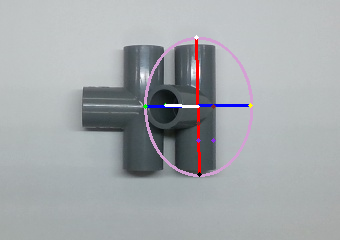

In [42]:
img_ellipse = cv2.circle(img_ellipse, (sel_line_pts1[0],sel_line_pts1[1]), 2, (42, 42, 128), -1) #棕色
img_ellipse = cv2.circle(img_ellipse, (sel_line_pts2[0],sel_line_pts2[1]), 2, (226, 43, 138), -1) #紫色

cv2_imshow(img_ellipse)

In [ ]:
import numpy as np

def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1

    line = []
    err = dx - dy

    while True:
        line.append((x0, y0))

        if x0 == x1 and y0 == y1:
            break

        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

    return line

# 两点的坐标


# 使用 Bresenham 算法找出两点之间的所有像素点
line = bresenham_line(ellipse_xy[0], ellipse_xy[1], x, y)

find_max_height_list = []
# 输出结果
i = 0
for point in line:
  img_ellipse = cv2.circle(img_ellipse, (point), 1, (255, 255, 255), -1) #白色
  find_max_height_list.append(myArr[point[1],point[0]])
  print(i, point,myArr[point[1],point[0]])
  i +=1

find_max_height_list = np.array(find_max_height_list)
cv2_imshow(img_ellipse)

In [45]:
max_height_pixel = line[np.argmax(find_max_height_list)]

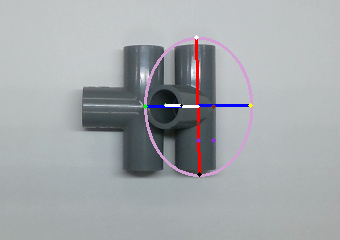

In [46]:
img_ellipse = cv2.circle(img_ellipse, (max_height_pixel), 1, (0, 0, 0), -1) #黑色
cv2_imshow(img_ellipse)

In [47]:
max_height_pixel

(181, 105)

In [48]:
catch_point = (int((max_height_pixel[0] + ellipse_xy[0])/2),int((max_height_pixel[1] + ellipse_xy[1])/2))
catch_point

(189, 105)

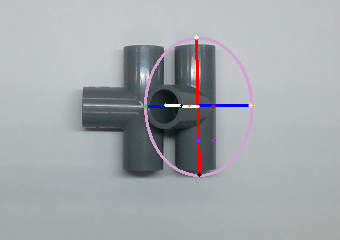

In [49]:
img_ellipse = cv2.circle(img_ellipse, (catch_point), 1, (0, 128, 255), -1) #橙色
cv2_imshow(img_ellipse)

平面計算＝＝＝＝＝＝＝＝＝＝＝

In [334]:
import numpy as np

def create_plane(point1, point2, point3):
    # 建立向量 AB 和 AC
    vector_AB = np.array(point2) - np.array(point1)
    vector_AC = np.array(point3) - np.array(point1)

    # 計算法向量
    normal_vector = np.cross(vector_AB, vector_AC)
    normalized_vector = normal_vector / np.linalg.norm(normal_vector)
    # 取得平面方程式的參數
    a, b, c = normal_vector
    d = -(a * point1[0] + b * point1[1] + c * point1[2])

    return a, b, c, d, normalized_vector

# 三個點的座標
point1 = [catch_point[0], catch_point[1], myArr[catch_point[1],catch_point[0]]]
point2 = [sel_line_pts1[0], sel_line_pts1[1], myArr[sel_line_pts1[1],sel_line_pts1[0]]]
point3 = [sel_line_pts2[0], sel_line_pts2[1], myArr[sel_line_pts2[1],sel_line_pts2[0]]]

# 建立平面
a, b, c, d ,normalized_vector= create_plane(point1, point2, point3)

# 打印平面方程式
print("平面方程式: {}x + {}y + {}z + {} = 0".format(a, b, c, d))


平面方程式: 884.0x + 0.0y + 816.0z + -207876.0 = 0


In [335]:
print(type(point1))

<class 'list'>


In [336]:
myArr[sel_line_pts2[1],sel_line_pts2[0]]

24.0

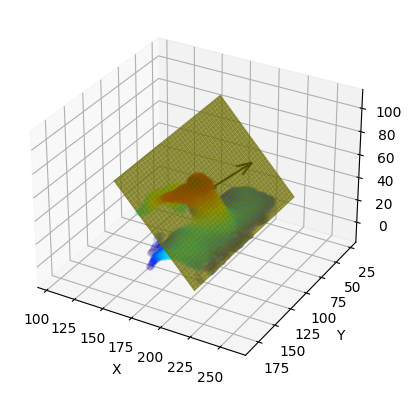

In [337]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 創建網格
yy = np.arange(int(min(maj_y1,maj_y2)-10),int(max(maj_y1,maj_y2)+10),1)
xx = np.arange(min(x,sel_line_pts1[0])-10,max(x,sel_line_pts1[0])+10,1)
X, Y = np.meshgrid(xx, yy)


# 計算 z
Z = -(a * X + b * Y + d) / c

# 繪製平面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


nonzero_pixels = np.nonzero(depth_data_result)
nonzero_values = depth_data_result[nonzero_pixels]

sc = ax.scatter3D(nonzero_pixels[1],nonzero_pixels[0],nonzero_values, c = nonzero_values, alpha = 0.1,cmap='jet')
# sc = ax.scatter3D(nonzero_pixels[1],nonzero_pixels[0],nonzero_values, c = 'blue', alpha = 0.1)
ax.plot_surface(X, Y, Z, alpha=0.8 , color='y')

# 繪製點
plane_points = np.array([point1,point2,point3])

# 繪製點圖
ax.scatter3D(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2], c='black',s = 150 , marker='*',alpha = 1)
# # # 產生向量場資料
ax.quiver(plane_points[0,0], plane_points[0,1], plane_points[0,2], normalized_vector[0],normalized_vector[1],normalized_vector[2],color='black', length=50, normalize=True)


# 設定坐標軸標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis("equal")
# plt.colorbar(sc)
ax.invert_yaxis()
# ax.view_init(elev=0, azim=-90)
# 顯示圖形
plt.show()

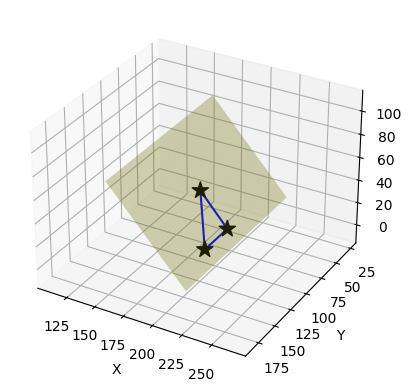

In [342]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 創建網格
yy = np.arange(int(min(maj_y1,maj_y2)-10),int(max(maj_y1,maj_y2)+10),1)
xx = np.arange(min(x,sel_line_pts1[0])-10,max(x,sel_line_pts1[0])+10,1)
X, Y = np.meshgrid(xx, yy)


# 計算 z
Z = -(a * X + b * Y + d) / c

# 繪製平面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.3 , color='y')

# 繪製點
plane_points = np.array([point1,point2,point3])

# 繪製點圖
ax.scatter3D(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2], c='black',s = 150 , marker='*',alpha = 1)

# # # 產生向量場資料
# ax.quiver(plane_points[0,0], plane_points[0,1], plane_points[0,2], normalized_vector[0],normalized_vector[1],normalized_vector[2],color='black', length=50, normalize=True)
ax.plot(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2],c='b')
ax.plot([plane_points[0,0],plane_points[2,0]],[plane_points[0,1],plane_points[2,1]],[plane_points[0,2],plane_points[2,2]],c='b')

# 設定坐標軸標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis("equal")
# plt.colorbar(sc)
ax.invert_yaxis()
# ax.view_init(elev=0, azim=-90)
# 顯示圖形
plt.show()

In [339]:
plane_points[0]

array([189., 105.,  50.])

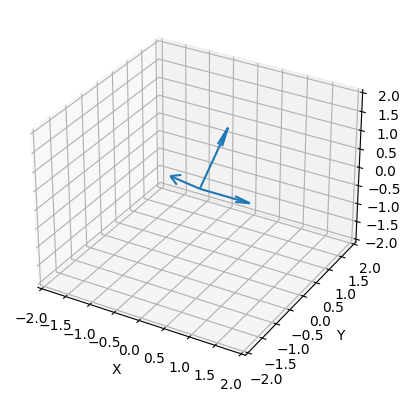

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# 建立一個 3D 圖形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定義箭頭的起點座標和分量
X = np.array([0, 0, 0])
Y = np.array([0, 0, 0])
Z = np.array([0, 0, 0])
U = np.array([1, 0, 0])
V = np.array([0, 1, -1])
W = np.array([0, 1, 1])

# 繪製箭頭圖
ax.quiver(X, Y, Z, U, V, W)

# 設定坐標軸範圍
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
# ax.view_init(elev=0, azim=-90)
# 設定坐標軸標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# 顯示圖形
plt.show()

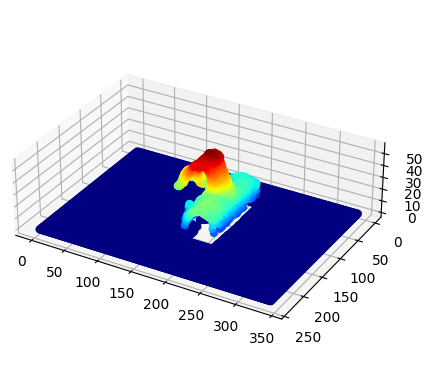

In [145]:
from mpl_toolkits.mplot3d import Axes3D

depth_data_result = np.copy(myArr)

depth_data_result[np.where((blob_img == [0, 0, 0]).all(axis=2))] = 0

Y = np.arange(0,np.shape(depth_data_result)[0],1)
X = np.arange(0,np.shape(depth_data_result)[1],1)
X,Y = np.meshgrid(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X, Y, depth_data_result,c = depth_data_result,cmap ='jet')
# ax.scatter(X,Y,myArr)
# ax.scatter(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2], c='r', marker='o')


ax.invert_yaxis()
# ax.invert_xaxis()
# ax.view_init(elev=90, azim=-90)
ax.set_box_aspect([350, 250, 100])
plt.show()

In [ ]:

Y = np.arange(catch_point[1],sel_line_pts1[1],1)
X = np.arange(catch_point[0],sel_line_pts1[0],1)

Y

In [ ]:
catch_point[1],sel_line_pts1[1]

(105, 106)

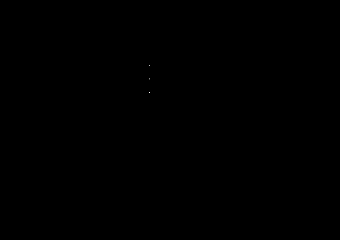

In [ ]:
import cv2
import numpy as np

# 读取图像
image_trans = np.zeros_like(mask_trans)
image_trans[int(pts1[1]),int(pts1[0])] = 255
image_trans[int(pts2[1]),int(pts2[0])] = 255
image_trans[ellipse_xy[1],ellipse_xy[0]] = 255

# 定义变换矩阵
M = np.float32([[0.5, 0, 50], [0, 0.8, -20]])

# 进行仿射变换
transformed_image = cv2.warpAffine(image_trans, M, (image_trans.shape[1], image_trans.shape[0]))

# 显示结果
cv2_imshow(transformed_image)



In [ ]:
def calculate_slope(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    if x2 - x1 == 0:
      slope = float('nan')  # 斜率不存在，使用 NaN 表示
    elif y2 - y1 == 0:
      slope = 0  # 水平线，斜率为 0
    else:
      slope = (y2 - y1) / (x2 - x1)  # 其他情况，计算斜率
    return slope

def calculate_intercept(point, slope):
    x, y = point
    intercept = y - slope * x
    return intercept

# 計算斜率
slope = calculate_slope((0,0), (0,0))
# 計算截距
intercept = calculate_intercept((0,0), slope)
# 打印直線方程式
print("直線方程式: y =", slope, "x +", intercept)


直線方程式: y = nan x + nan


直線方程式: y = 1.0 x + 0.0
垂直向量的方程式為 y = -1.0x + 100.0
80 20


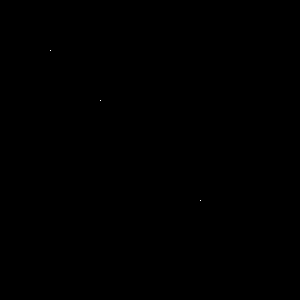

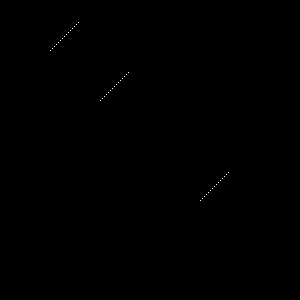

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 原始直線的起點和終點座標
x1, y1 = 50, 50
x2, y2 = 200, 200


def calculate_slope(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    if x2 - x1 == 0:
      slope = float('nan')  # 斜率不存在，使用 NaN 表示
    elif y2 - y1 == 0:
      slope = 0  # 水平线，斜率为 0
    else:
      slope = (y2 - y1) / (x2 - x1)  # 其他情况，计算斜率
    return slope
def calculate_intercept(point, slope):
    x, y = point
    intercept = y - slope * x
    return intercept

# 兩個點的座標
point1 = (x1, y1)
point2 = (x2, y2)

# 計算斜率
slope = calculate_slope(point1, point2)

# 計算截距
intercept = calculate_intercept(point1, slope)

# 打印直線方程式
print("直線方程式: y =", slope, "x +", intercept)

def find_perpendicular_vector(m, x1, y1):
    # 計算垂直於直線的斜率
    perpendicular_slope = -1 / m

    # 建立垂直向量的新直線方程式
    b = y1 - perpendicular_slope * x1

    # 返回新直線方程式的斜率和截距
    return perpendicular_slope, b


# 計算垂直向量的斜率和截距
perpendicular_slope, perpendicular_b = find_perpendicular_vector(slope, x1, y1)

# 打印垂直向量的方程式
print(f"垂直向量的方程式為 y = {perpendicular_slope}x + {perpendicular_b}")
point3 = (20, perpendicular_slope*20+perpendicular_b)


# 在空白圖像上繪製平移後的直線
image = np.zeros((300, 300), dtype=np.uint8)
# img_ellipse = cv2.circle(img_ellipse, (int(x_point),int(y_point)), 2, (255, 255, 0), -1)
new_x = 80

# image = cv2.line(image, point1, point2, 255, 1)
image[50,50] = 255
image[100,100] = 255
image[200,200] = 255

# image = cv2.line(image, (x1, y1), (new_x, int(perpendicular_slope*new_x+perpendicular_b)), 255, 1)
print(new_x, int(perpendicular_slope*new_x+perpendicular_b))


image_translate = np.zeros((300, 300), dtype=np.uint8)
for i in range(0,30,2):
  M = np.float32([[1, 0, i], [0, 1, int(perpendicular_slope*i)]]) # 2x3 矩陣，x 軸平移 100，y 軸平移 100
  output = cv2.warpAffine(image, M, (300, 300))
  image_translate += output

# output = cv2.line(output, point1, point2, 255, 1)
# image_translate = cv2.line(image_translate, (x1, y1), (new_x, int(perpendicular_slope*new_x+perpendicular_b)), 255, 1)


# 顯示圖像
cv2_imshow(image)
cv2_imshow(image_translate)


In [ ]:
def find_perpendicular_vector(m, x1, y1):
    # 計算垂直於直線的斜率
    perpendicular_slope = -1 / m

    # 建立垂直向量的新直線方程式
    b = y1 - perpendicular_slope * x1

    # 返回新直線方程式的斜率和截距
    return perpendicular_slope, b

# 原始直線方程式
m = 2
b = 3

# 點的座標 
x1 = 0
y1 = 3

# 計算垂直向量的斜率和截距
perpendicular_slope, perpendicular_b = find_perpendicular_vector(m, x1, y1)

# 打印垂直向量的方程式
print(f"垂直向量的方程式為 y = {perpendicular_slope}x + {perpendicular_b}")


垂直向量的方程式為 y = -0.5x + 3.0


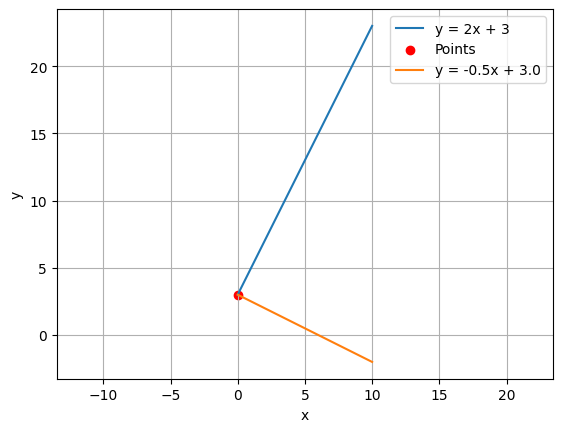

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_line(m, b):
    # 生成x的範圍
    x = np.linspace(0, 10, 5)

    # 根據直線方程式計算對應的y值
    y = m * x + b

    # 繪製直線圖形
    plt.plot(x, y, label='y = {}x + {}'.format(m, b))


# 直線方程式的斜率和截距
m = 2
b = 3

# 繪製直線圖形
plot_line(m, b)
plt.scatter(x1, y1, color='red', label='Points')
plot_line(perpendicular_slope, perpendicular_b)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
